# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - Humidity in the air in %
* ### Windspeed - Speed of the wind in m/s
* ### Visibility - Visibility in m, 10m
* ### Dew point temperature - Dew point temperature in Celsius
* ### Solar radiation - Energy radiated by Sun in MJ/m2
* ### Rainfall - Amount of raining in mm
* ### Snowfall - Amount of snowing in cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Loading Dataset and Importing Modules**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the Dataset
df=pd.read_csv('/content/drive/MyDrive/solved project yes bank ml supervised/SeoulBikeData.csv', encoding = 'unicode_escape')

# **Understanding More About The Data**

##summary of data

In [ ]:
# Getting top 5 rows of the dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Getting last 5 rows of the dataset
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Getting the shape of dataset with rows and columns
df.shape

(8760, 14)

In [ ]:
# check details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Looking for the description of the dataset to get insights of the data
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


####In a day we have 24 hours and we have 365 days in year so when 365 multiplied by 24 we get 8760, which represents the number of rows in the dataset.

##Missing values

In [ ]:
#check for count of missing values in each column.
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

##Duplicate values

In [ ]:
# Checking Duplicate Values
len(df[df.duplicated()])

0

####In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.

##Cahanging column name

In [ ]:
df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

##Breaking date column

In [ ]:
# Date columns to Date format conversion
from datetime import datetime as dt
df['date']= pd.to_datetime(df['date'])

In [ ]:
#add month, day_of_week columns
for df in [df]:
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek

####So we splitting the "date" column into 2 different column i.e month, day_of_week.
####The column day_of_week, it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the day_of_week column.

####Adding new column 'weekend', which indicates whether a given day is a weekday(0) or a weekend(1):

In [ ]:
 df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x>4 else 0)

# {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df=df.drop(columns=['date','day_of_week'],axis=1)

In [ ]:
df['weekend'].value_counts()

0    6216
1    2544
Name: weekend, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  8760 non-null   int64  
 1   hour               8760 non-null   int64  
 2   temperature        8760 non-null   float64
 3   humidity           8760 non-null   int64  
 4   wind_speed         8760 non-null   float64
 5   visibility         8760 non-null   int64  
 6   dew_point_temp     8760 non-null   float64
 7   solar_radiation    8760 non-null   float64
 8   rainfall           8760 non-null   float64
 9   snowfall           8760 non-null   float64
 10  seasons            8760 non-null   object 
 11  holiday            8760 non-null   object 
 12  func_day           8760 non-null   object 
 13  month              8760 non-null   int64  
 14  weekend            8760 non-null   int64  
dtypes: float64(6), int64(6), object(3)
memory usage: 1.0+ MB


##Changing data type

####As Hour, month and weekdays_weekend column are shown as a integer data type but actually it is a categorical data type. So we need to change this data type otherewise we can mislead by this.

In [ ]:
#Change the int64 column into catagory column
cols=['hour','month','weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [ ]:
df.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'func_day', 'month', 'weekend'],
      dtype='object')

# **Exploratory Data Analysis Of The dataset**

## **Analysis of Dependent variable:**

In [ ]:
# Assign dependent variable.
dependent_variable = ['rented_bike_count']

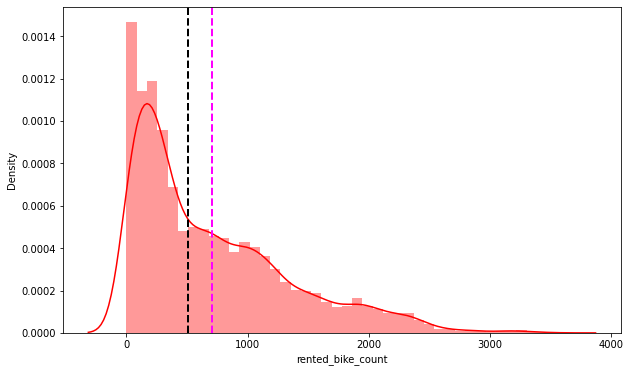

In [ ]:
# Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['rented_bike_count'],hist=True ,color="r")
ax.axvline(df['rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

###The above graph shows that Rented Bike Count has positively skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal, so we should perform some operation to make it normal.

###Normalise rented_bike_count column data

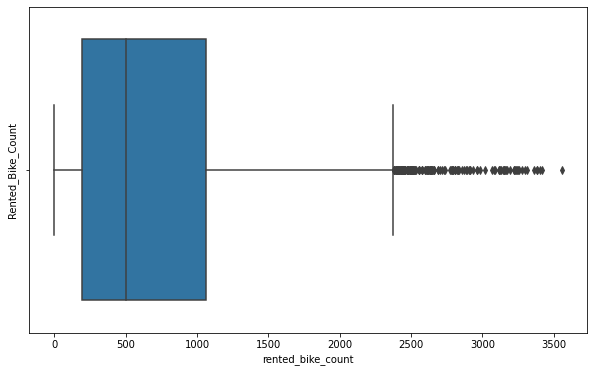

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['rented_bike_count'])
plt.show()

### The above boxplot shows that we have detect outliers in Rented Bike Count column

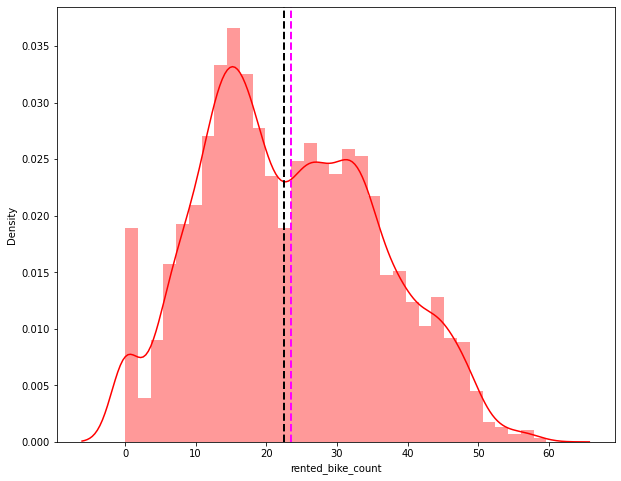

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['rented_bike_count']), color="r")
ax.axvline(np.sqrt(df['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

### Here we get almost normal distribution.

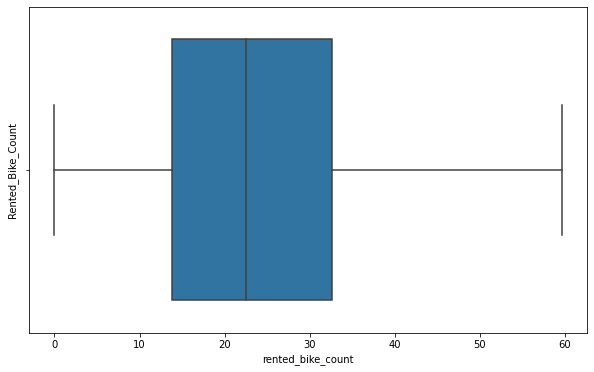

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['rented_bike_count']))
plt.show()

### After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

##**Analysis of Categorical variables**

In [ ]:
categorical_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'weekend']


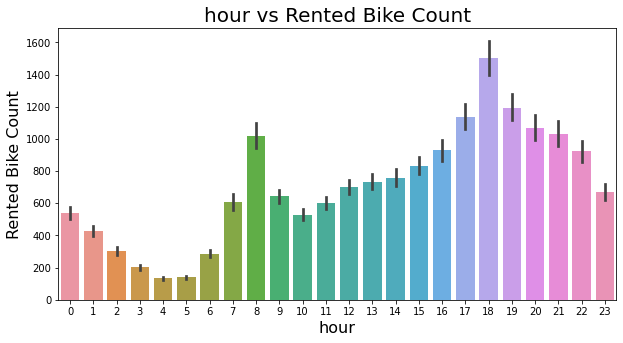

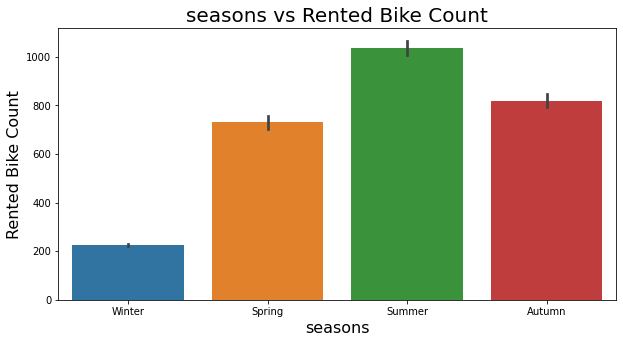

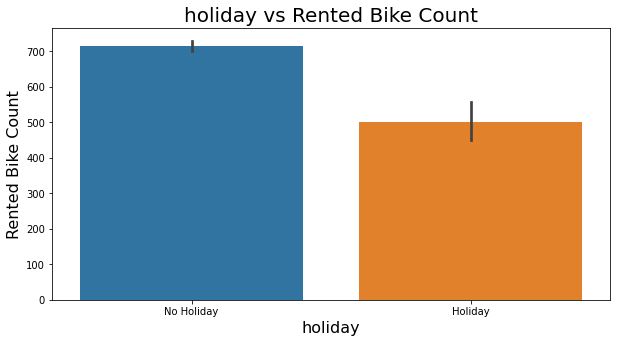

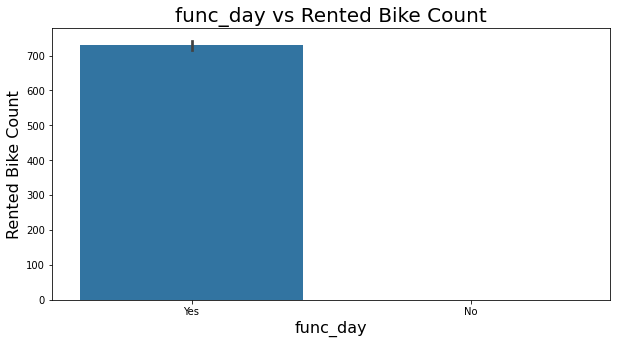

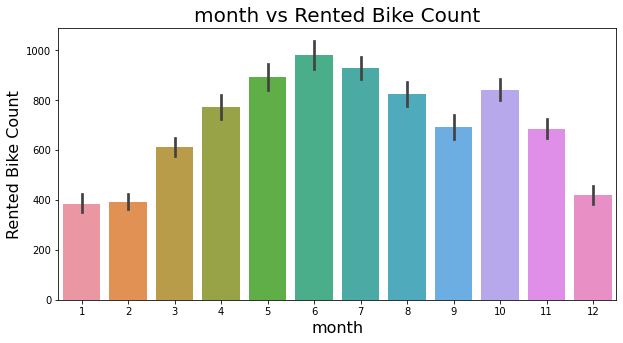

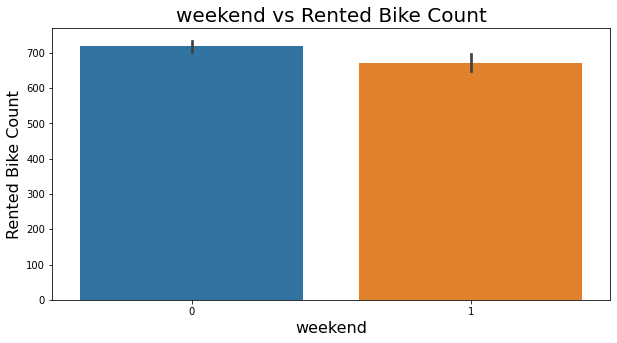

In [ ]:
for col in categorical_var:
  plt.figure(figsize=(10,5))
  sns.barplot(x=col,y='rented_bike_count',data=df)
  plt.xlabel(col, fontsize=16)
  plt.ylabel('Rented Bike Count', fontsize=16)
  plt.title(col+' vs '+ 'Rented Bike Count', fontsize=20)
  plt.show()

#### plot1: generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.
####plot2: In summer season the use of rented bike is higher and lower in winter season because of snowfall.
####plot3: The rented bike count is higher on working days than on non working days.
####plot4: On a non functioning day, no bikes are rented in all the instances of the data.
####plot5: From the above bar plot we can clearly say that from  the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.
####plot6: From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.

**Bike demand throughout the day:**

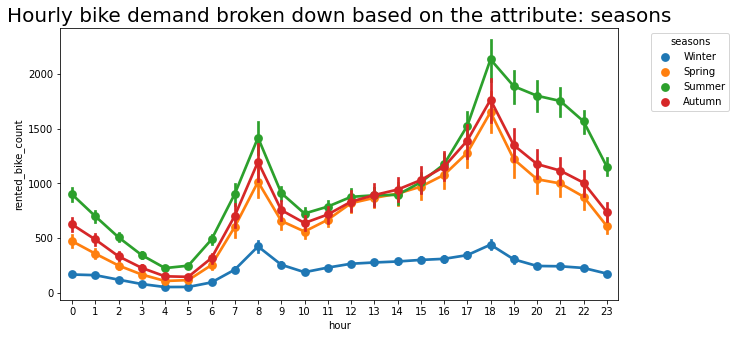

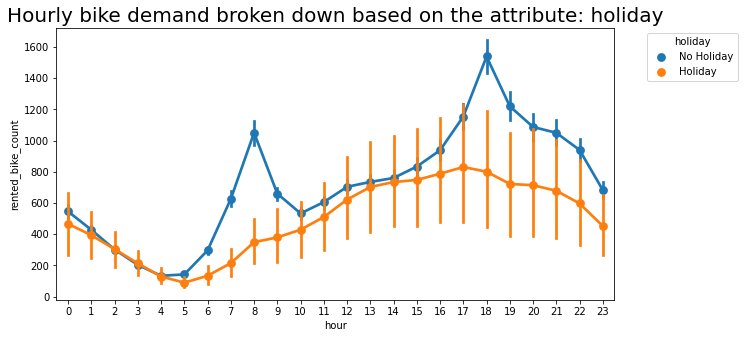

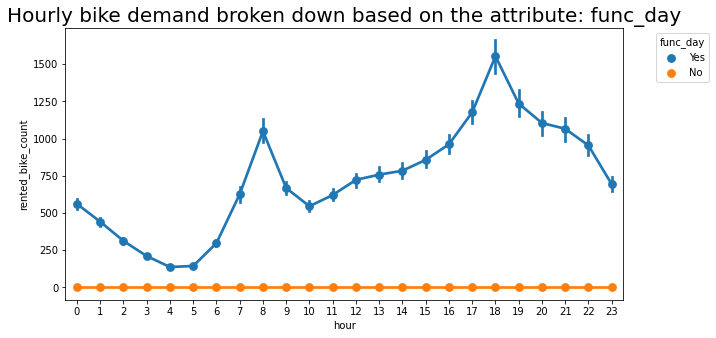

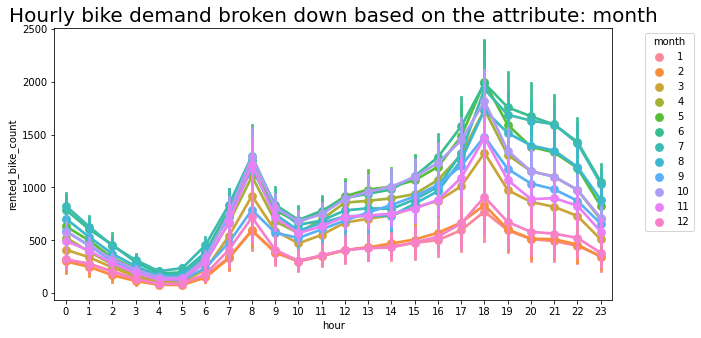

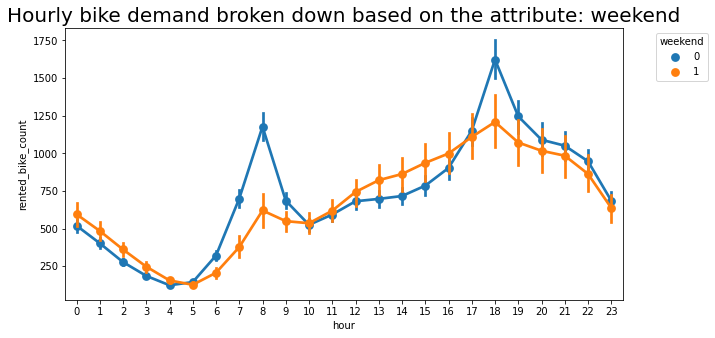

In [ ]:
for i in categorical_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i,fontsize=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show

####In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.
####plot shows that in holiday people uses the rented bike from 2pm-8pm
####The orange color represent the weekend days, and it show that the demand of rented bikes are low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.

##**Analyze of Continious variables**

In [ ]:
#assign the coulmn to variavle
continuous_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']

###Analyzing the distribution

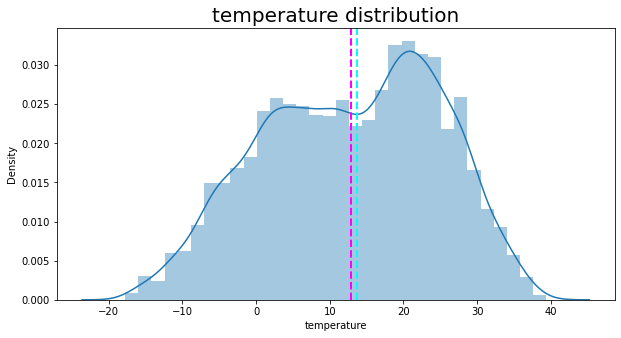

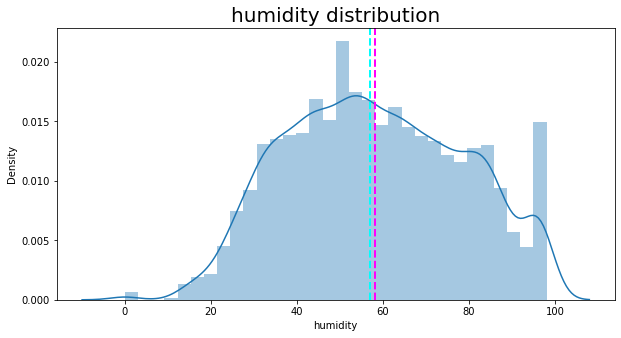

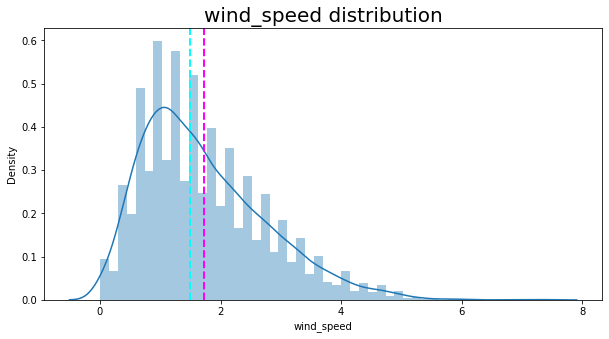

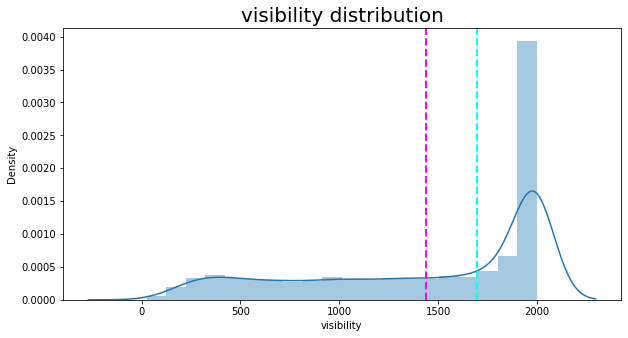

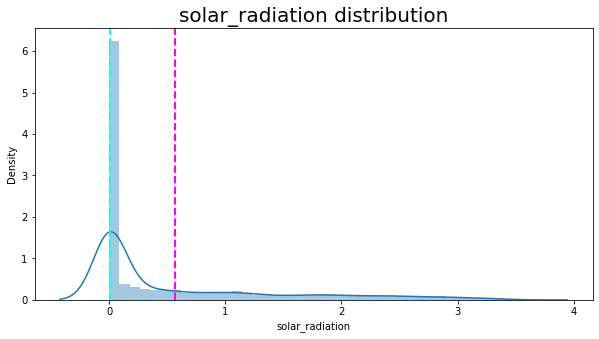

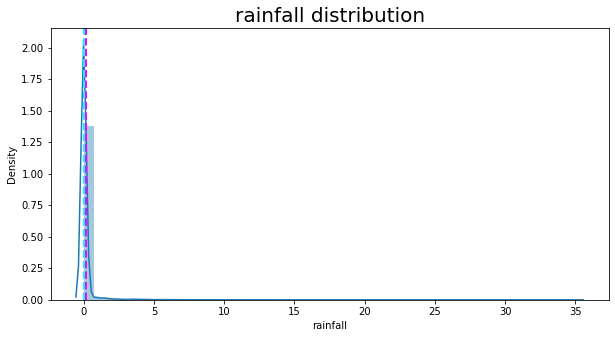

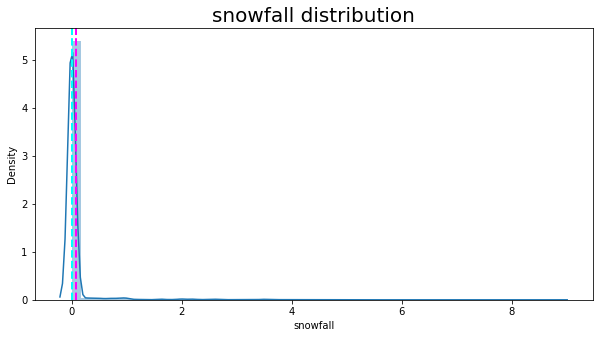

In [ ]:
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution',fontsize=20)
  plt.show()

####Normally distributed attributes: temperature, humidity.
####Positively skewed attributes: wind, solar_radiation, snowfall, rainfall.
####Negatively skewed attributes: visibility.

###Regression plot for analyze linear relationship with dependent variable

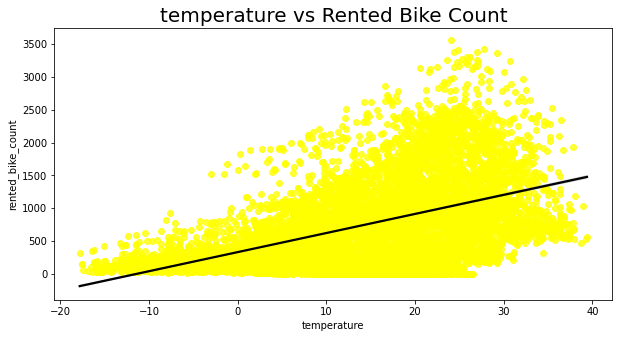

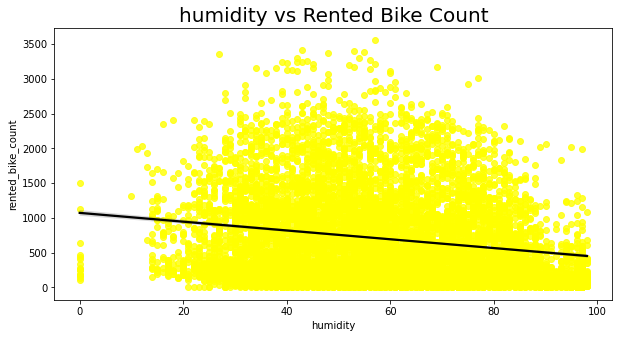

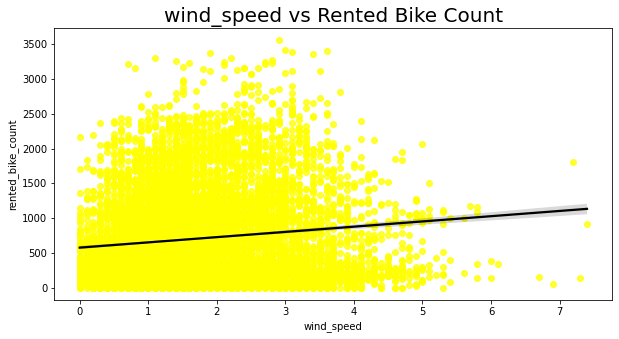

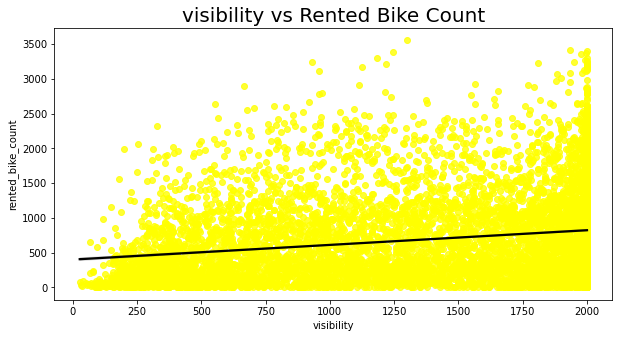

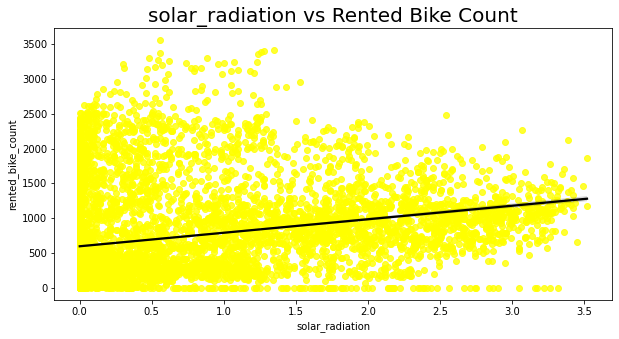

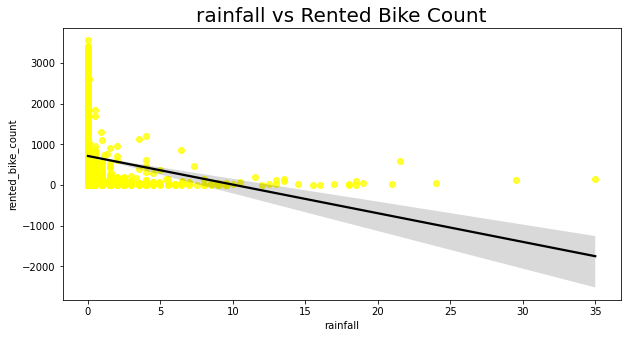

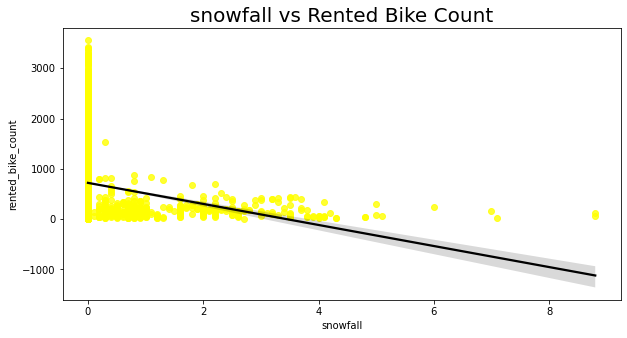

In [ ]:
#printing the regression plot 
for col in continuous_var:
  fig,ax=plt.subplots(figsize=(10,5))
  sns.regplot(x=df[col],y=df['rented_bike_count'],scatter_kws={"color": 'yellow'}, line_kws={"color": "black"})
  plt.title(col+' vs '+ 'Rented Bike Count', fontsize=20)

####From the above regression plot we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Solar_Radiation' are positively relation to the target variable, which means the rented bike count increases with increase of these features.
####Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.

###Analyzing the relationship between the dependent variable and the continuous variables

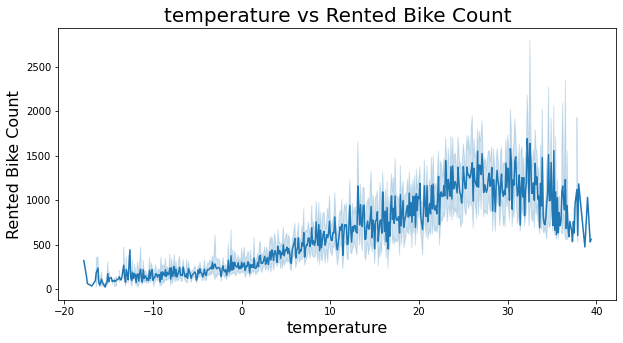

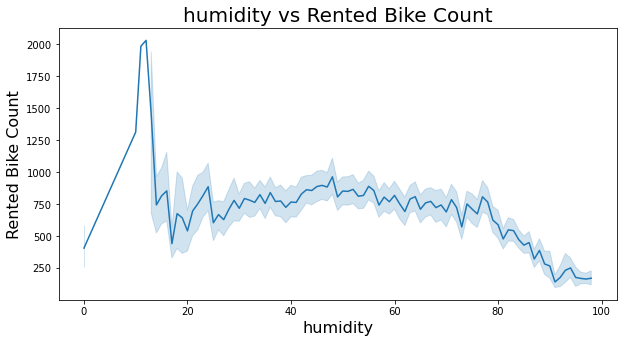

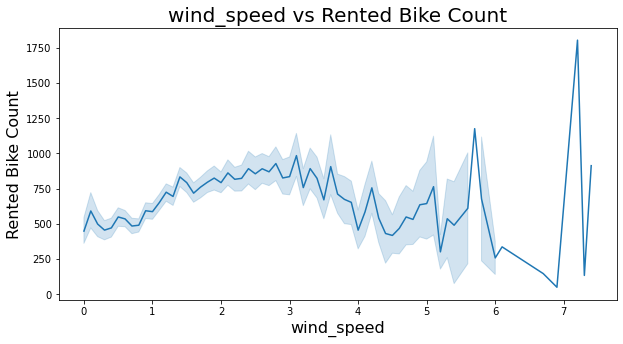

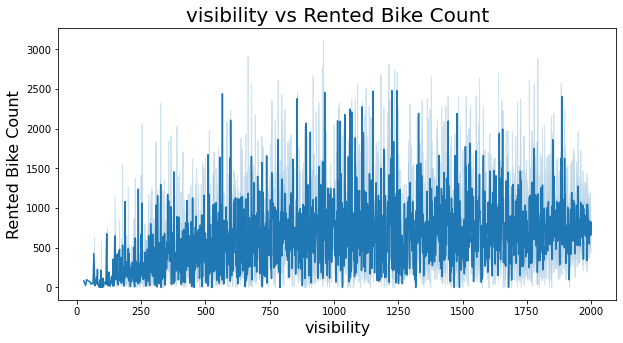

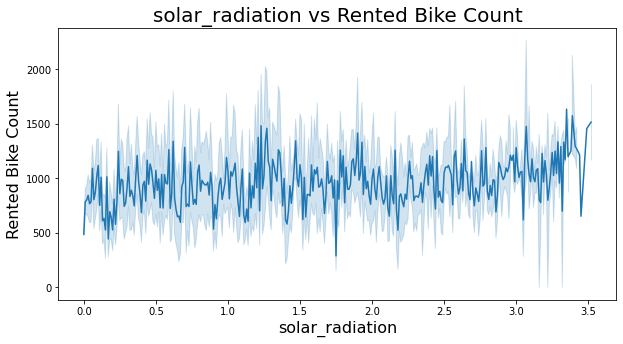

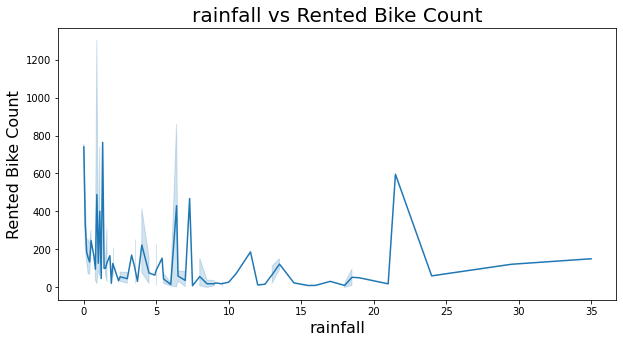

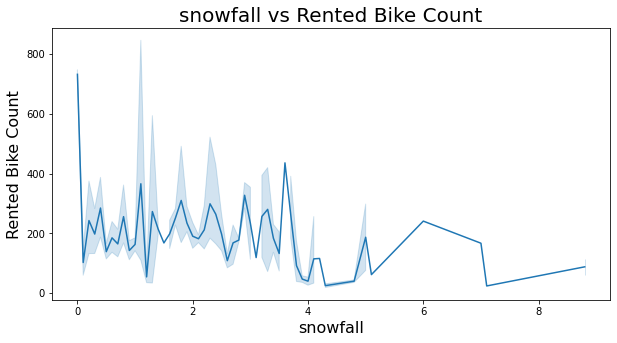

In [ ]:
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.lineplot(x=df[col],y='rented_bike_count',data=df)
  plt.xlabel(col, fontsize=16)
  plt.ylabel('Rented Bike Count', fontsize=16)
  plt.title(col+' vs '+ 'Rented Bike Count', fontsize=20)
  plt.show()

####From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average
####We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.
####from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000
####We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower
####We can see from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes

###Heatmap

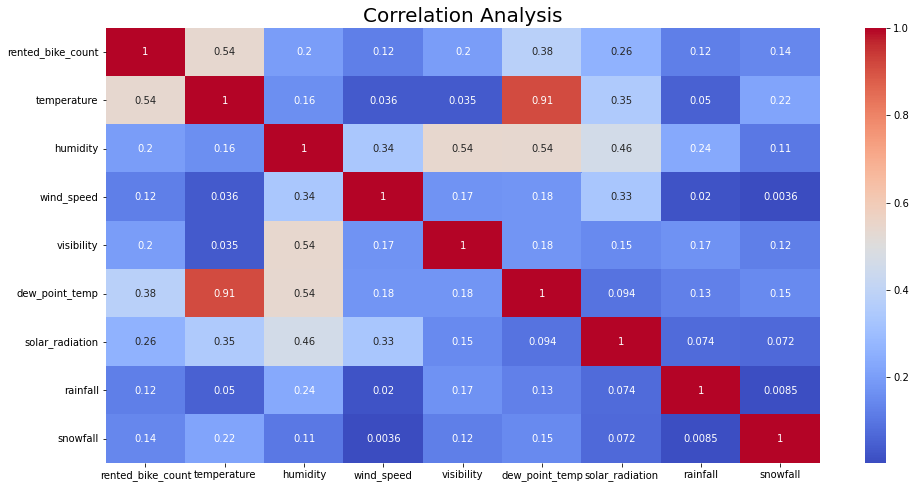

In [ ]:
 ## ## plot the Correlation matrix
plt.figure(figsize=(16,8))
plt.title('Correlation Analysis',fontsize=20)
correlation =df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

####There is no multicollinerity in the data.

## ***Create the Dummy variables and Data encoding***

####A dataset may contain various type of values, sometimes it consists of categorical values. So in-order to use those categorical value for programming efficiently we create dummy variables.

In [ ]:
#Assign all catagoriacla features to a variable
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['hour', 'seasons', 'holiday', 'func_day', 'month', 'weekend'], dtype='object')

###One hot encoding

####A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [ ]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
   df_copy = one_hot_encoding(df_copy, col)
df_copy.head()       

,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,hour_1,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekend_1
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
